# 1 动手学线性代数

线性代数知识主要用于解决离散型矩阵形状的数据。python中用于线性代数矩阵处理的库主要是numpy。[numpy官网](https://numpy.org/doc/stable/user/numpy-for-matlab-users.html)还介绍了numpy包中各种函数与MATLAB相同操作的一一对应关系。

## 1.1 理论知识

### 1.1.1 线性方程组与向量

* 引入：鸡兔同笼问题，今有头共10只，脚共28只。问鸡兔各有几何？

* 分析：利用高中知识建立方程组，设有鸡、兔各$x$、$y$只。由题意得：
$$\left \{
\begin{aligned}
x+y = 10 \\
2x+4y = 28
\end{aligned}
\right.$$

* 求解：由方程组得增广矩阵：
$$
\begin{bmatrix}
1 & 1 & 10 \\
2 & 4 & 28
\end{bmatrix}
$$
经初等变换：
$$
\begin{bmatrix}
1 & 1 & 10 \\
2 & 4 & 28
\end{bmatrix}
\overset{第二行-第一行*2}{\rightarrow} 
\begin{bmatrix}
1 & 1 & 10 \\
0 & 2 & 8
\end{bmatrix}
\overset{第二行/2}{\rightarrow} 
\begin{bmatrix}
1 & 1 & 10 \\
0 & 1 & 4
\end{bmatrix}
\overset{第一行-第二行}{\rightarrow} 
\begin{bmatrix}
1 & 0 & 6 \\
0 & 1 & 4
\end{bmatrix}
$$

根据变换结果可知，$x=6, y =4$。

python代码

In [2]:
import numpy as np

A = np.array([[1, 1], [2, 4]])
b = np.array([[10], [28]])
x = np.linalg.solve(A, b)
print("方程组的解为：\n{}".format(x))

方程组的解为：
[[6.]
 [4.]]


### 1.1.2 向量空间、矩阵、行列式及范数

* 引入：对于刚才的题目，现又往里加入鸡鸭若干只，头变为14个，脚变为40只。问鸡、兔、鸭各几何？

* 分析：依然是建立方程组, 设有鸡、兔、鸭各$x$、$y$、$z$只。由题意得：
$$
\left \{
\begin{aligned}
x+y+z=14 \\
2x+4y+2z=40
\end{aligned}
\right.
$$

* 求解：由方程得增广矩阵：
$$
\begin{bmatrix}
1 & 1 & 1 & 14\\
2 & 4 & 2 & 40
\end{bmatrix}
$$

经初等变换：
$$
\begin{bmatrix}
1 & 1 & 1 & 14\\
2 & 4 & 2 & 40
\end{bmatrix}
\overset{第二行/2}{\rightarrow}
\begin{bmatrix}
1 & 1 & 1 & 14\\
1 & 2 & 1 & 20
\end{bmatrix}
\overset{第二行-第一行}{\rightarrow}
\begin{bmatrix}
1 & 1 & 1 & 14\\
0 & 1 & 0 & 6
\end{bmatrix}
\overset{第一行-第二行}{\rightarrow}
\begin{bmatrix}
1 & 0 & 1 & 8\\
0 & 1 & 0 & 6
\end{bmatrix}
$$

根据变换结果知：$x+z=8, y=6$。这说明$x, z$具有多个解。

python代码

In [4]:
import numpy as np

A = np.array([[1, 1, 1], [2, 4, 2]])
b = np.array([[14], [40]])
# x = np.linalg.solve(A, b)   # 不能用solve方法，因为solve方法要求 A为方阵（满秩方阵）
x = np.linalg.lstsq(A, b, rcond=None)     # lstsq方法返回的解是利用最小二乘法求解出来的，返回的解在在所有的解中范数最小
print("方程组的解为：\n{}".format(x))

方程组的解为：
(array([[4.],
       [6.],
       [4.]]), array([], dtype=float64), 2, array([5.16724093, 0.54737667]))


#### 向量的运算法则

给定$n$维向量：
$$\bf{x} = 
\begin{bmatrix}
x_{1} \\
x_{2} \\
x_{3} \\
\cdots \\
x_{n}
\end{bmatrix}
\bf{y} = 
\begin{bmatrix}
y_{1} \\
y_{2} \\
y_{3} \\
\cdots \\
y_{n}
\end{bmatrix}$$

* 向量相加:两个相同维度得向量相加。
$$\bf{x+y} = \begin{bmatrix}
x_{1} + y_{1} \\
x_{2} + y_{2}\\
x_{3} + y_{3}\\
\cdots \\
x_{n} + y_{n}
\end{bmatrix}$$

* 向量数乘：一个常数$k$乘以一个向量。
$$k\bf{x}=
\begin{bmatrix}
kx_{1}  \\
kx_{2} \\
kx_{3} \\
\cdots \\
kx_{n} 
\end{bmatrix}$$


> 注（习惯）：默认所有的向量都采用列向量的形式。

In [5]:
import numpy as np

x = np.array([1, 2, 3])
y = np.array([4, 5, 6])
print("x={}, y={}".format(x, y))

# 向量加法
print("x+y={}".format(x+y))

# 向量数乘
k = 3
print("k*x={}".format(k*x))

x=[1 2 3], y=[4 5 6]
x+y=[5 7 9]
k*x=[3 6 9]


#### 向量的线性相关与线性无关

* 定义：给定一组向量$(\alpha_1, \alpha_2, \cdots, \alpha_k)$，对于向量$\beta$，如果能被存在一组不全为0的常数$m_1, m_2, \cdots, m_k$，使得
$$\beta = m_1\alpha_1 + m_2\alpha_2 + \cdots + m_k\alpha_k$$
则称向量$\beta$与向量组$(\alpha_1, \alpha_2, \cdots, \alpha_k)$是线性相关的，或称$\beta$可以被向量组$(\alpha_1, \alpha_2, \cdots, \alpha_k)$线性表出。否则，则成为非线性相关。一旦向量是线性相关的，也就说明$\beta$是一个多余的向量，因为它可以由其他的向量去表示。

对与之前得矩阵
$\begin{bmatrix}
1 & 1 & 1 & 14\\
2 & 4 & 2 & 40
\end{bmatrix}$，可以将未知数系数组成的矩阵$\begin{bmatrix}
1 & 1 & 1 \\
2 & 4 & 2 
\end{bmatrix}$看成一组向量，由于第一列和第三列线性相关，故方程又多个解，因此，通过判断方程系数矩阵各列（或各行）是否线性相关可以推断出方程是否有唯一解或多解。

* 引出：然而，如果当一个方程组未知数的量很大之后，你需要去判断哪些方程是“有效的”也是一件非常花时间的工作，有没有一个更好的方法呢，答案是有的，那就是行列式。
> 注：只有$n$维矩阵才有行列式。

In [6]:
import numpy as np

A = np.array([[1, 1, 1],
              [2, 4, 2],
              [2, 2, 2]])

np.linalg.det(A) # 计算方阵A的行列式
print("A的行列式的值为：",np.linalg.det(A))

B = np.array([[1,1,1,1],
              [1,2,0,0],
              [1,0,3,0],
              [1,0,0,4]])
B_det = np.linalg.det(B)
print("B的行列式的值为：",B_det)

A的行列式的值为： 0.0
B的行列式的值为： -2.0


> 判断方程是否有唯一解：
> - $n$个未知数要有$n$个方程
> - 使用线性无关去判断“有效的方程”
> - 系数行列式 $|A| \ne  0$,则这个方程组是有唯一解的(克莱姆法则)

* 对于方程的解，克拉姆法则提出了方程的解的结构：
设线性方程组的表达式为：$\left\{ \begin{array}{c}a_{11} x_{1}+a_{12} x_{2}+\cdots+a_{1 n} x_{n}=b_{1} \\\\ a_{21} x_{1}+a_{22} x_{2}+\cdots+a_{2 n} x_{n}=b_{2} \\\\ \cdots \cdots \\\\ a_{n 1} x_{1}+a_{n 2} x_{2}+\cdots+a_{n n} x_{n}=b_{n}\end{array}\right.$，系数行列式为：$D = \left|\begin{array}{cccc}a_{11} & a_{12} & \cdots & a_{1 n} \\\\ a_{21} & a_{22} & \cdots & a_{2 n} \\\\ \cdots & \cdots & \cdots & \cdots \\\\ a_{n 1} & a_{n 2} & \cdots & a_{m n}\end{array}\right| \neq 0$，则该线性方程组有且仅有唯一解:
$$
x_{1}=\frac{D_{1}}{D}, x_{2}=\frac{D_{2}}{D}, \cdots, x_{n}=\frac{D_{n}}{D}
$$
其中，$D_{j}=\left|\begin{array}{ccccccc}a_{11} & \cdots & a_{1, j-1} & b_{1} & a_{1, j+1} & \cdots & a_{1 n} \\\\ a_{21} & \cdots & a_{2, j-1} & b_{2} & a_{2, j+1} & \cdots & a_{2 n} \\\\ \cdots & \cdots & \cdots & \cdots & \cdots & \cdots & \cdots \\\\ a_{n 1} & \cdots & a_{n, j-1} & b_{n} & a_{n, j+1} & \cdots & a_{n n}\end{array}\right|$


例子：解线性方程组 $\left\{\begin{array}{l}2 x_{1}+x_{2}-5 x_{3}+x_{4}=8 \\ x_{1}-3 x_{2}-6 x_{4}=9 \\ 2 x_{2}-x_{3}+2 x_{4}=-5 \\ x_{1}+4 x_{2}-7 x_{3}+6 x_{4}=0\end{array}\right.$

**解：**方程组的系数行列式
$$
D=\left|\begin{array}{cccc}
2 & 1 & -5 & 1 \\
1 & -3 & 0 & -6 \\
0 & 2 & -1 & 2 \\
1 & 4 & -7 & 6
\end{array}\right|=27 \neq 0
$$
由克莱姆法则知：方程组有唯一解.

$D_{1}=\left|\begin{array}{cccc}8 & 1 & -5 & 1 \\\\ 9 & -3 & 0 & -6 \\\\ -5 & 2 & -1 & 2 \\\\ 0 & 4 & -7 & 6\end{array}\right|=81 \Rightarrow x_{1}=\frac{D_{1}}{D}=\frac{81}{27} = 3$

$D_{2}=\left|\begin{array}{cccc}2 & 8 & -5 & 1 \\\\ 1 & 9 & 0 & -6 \\\\ 0 & -5 & -1 & 2 \\\\ 1 & 0 & -7 & 6\end{array}\right|=-108\Rightarrow x_{2}=\frac{D_{2}}{D} =\frac{-108}{27}= 4$

$D_{3}=\left|\begin{array}{cccc}2 & 1 & 8 & 1 \\\\ 1 & -3 & 9 & -6 \\\\ 0 & 2 & -5 & 2 \\\\ 1 & 4 & 0 & 6\end{array}\right|=-27 \Rightarrow x_{3}=\frac{D_{3}}{D} = =\frac{-27}{27}=-1$

$D_{4}=\left|\begin{array}{cccc}2 & 1 & -5 & 8 \\\\ 1 & -3 & 0 & 9 \\\\ 0 & 2 & -1 & -5 \\\\ 1 & 4 & -7 & 0\end{array}\right|=27 \Rightarrow x_{4}=\frac{D_{4}}{D} = \frac{27}{27} = 1$


python 代码

In [7]:
import numpy as np

D = np.array([[2.,1,-5,1],[1,-3,0,-6],[0,2,-1,2],[1,4,-7,6]])
D_det = np.linalg.det(D)

D1 = np.array([[8.,1,-5,1],[9,-3,0,-6],[-5,2,-1,2],[0,4,-7,6]])
D1_det = np.linalg.det(D1)

D2 = np.array([[2.,8,-5,1],[1,9,0,-6],[0,-5,-1,2],[1,0,-7,6]])
D2_det = np.linalg.det(D2)

D3 = np.array([[2.,1,8,1],[1,-3,9,-6],[0,2,-5,2],[1,4,0,6]])
D3_det = np.linalg.det(D3)

D4 = np.array([[2.,1,-5,8],[1,-3,0,9],[0,2,-1,-5],[1,4,-7,0]])
D4_det = np.linalg.det(D4)

x1 = D1_det / D_det
x2 = D2_det / D_det
x3 = D3_det / D_det
x4 = D4_det / D_det
print("克拉默法则解线性方程组的解为：\n x1={:.2f},\n x2={:.2f},\n x3={:.2f},\n x4={:.2f}".format(x1,x2,x3,x4))

克拉默法则解线性方程组的解为：
 x1=3.00,
 x2=-4.00,
 x3=-1.00,
 x4=1.00


#### 矩阵：矩阵不仅仅是用来解方程的

* 矩阵乘法：$A_{n\times m}B_{m\times k}=C_{n\times k}$

> 注：两矩阵相乘一定要注意两矩阵维度之间的对应关系。

In [13]:
import numpy as np

A = np.array([[1, 2, 3], [2, 3, 4]])
B = np.array([[2, 3, 4, 5], [4, 5, 6, 7], [2, 3, 4, 5]])
print("矩阵A的形状：{}".format(A.shape))
print(f"矩阵B的形状：{B.shape}")

print("AB=\n {}".format(np.matmul(A, B)))
# BA 会报错，因为维度不一致

矩阵A的形状：(2, 3)
矩阵B的形状：(3, 4)
AB=
 [[16 22 28 34]
 [24 33 42 51]]


* 矩阵加法：与向量加类似，两个维度相同的矩阵才可以进行相加操作。

In [14]:
import numpy as np

A = np.array([[1, 2, 3], [2, 3, 4]])
B = np.array([[2, 3, 4], [4, 5, 6]])

print("A + B=\n {}".format(np.add(A, B)))

A + B=
 [[ 3  5  7]
 [ 6  8 10]]


#### 特殊矩阵

1. 单位矩阵：主对角线元素全为1，$E=\begin{bmatrix}
1 & 0 & \cdots & 0 \\
0 & 1 & \cdots & 0 \\
\cdots & \cdots & \cdots & \cdots \\
0 & 0 & \cdots & 1
\end{bmatrix}$。

2. 初等矩阵：经初等变换后的矩阵称为初等矩阵。
> 初等变换：
> - 对换变换：互换矩阵第$i$行（列）和第$j$行（列）的位置，记为$r_{i}\leftrightarrow r_{j}（c_{i}\leftrightarrow c_{j}）$。
> - 数乘变换：用一个非0常数$k$乘矩阵的第$i$行（列），记为$kr_{i}(kc_{i})$。
> - 倍加变换：将矩阵第$j$行（列）的元素的$k$倍加到第$i$行（列），记为$r_{i}+kr_{j}(c_{i}+kc_{j})$。

   * 初等矩阵性质
     * 1. **交换第$i$个与第$j$个方程↔️系数矩阵第$i$行与第$j$行互换↔️左乘一个($P_{n \times n}$)，$P$为单位阵$E_{n}$第$i$行与第$j$行互换**
     * 2. **第$i$个方程左右乘非零常数$k$倍↔️系数矩阵第$i$行乘$k$↔️左乘一个($P_{n \times n}$)，$P$为单位阵$E_{n}$第$i$行乘$k$**
     * 3. **第$i$个方程加到第$j$个方程中↔️系数矩阵第$i$行加到第$j$行↔️左乘一个($P_{n \\times n}$)，$P$为单位阵$E_{n}$第$i$行加到第$j$行**

> 注：矩阵$A$左乘一个初等矩阵，表示对矩阵$A$做行变换；矩阵$A$右乘一个初等矩阵，表示对矩阵$A$做列变换

In [15]:
import numpy as np

print("单位矩阵：\n{}".format(np.eye(3)))

print('初等矩阵的性质：\n',"#"*50)

A = np.array([[1, 2, 3], [3, 4, 5], [3, 1, 2]])
print("矩阵A:\n{}".format(A))

P = np.array([[0, 1, 0], [1, 0, 0], [0, 0, 1]])  
print("交换矩阵A第1行和第2行的位置：\n{}".format(np.matmul(P, A)))

P = np.array([[1, 0, 0], [0, 2, 0], [0, 0, 1]])
print("矩阵A的第2行元素乘以2：\n{}".format(np.matmul(P, A)))

P = np.array([[1, 0, 0], [0, 1, 0], [1, 0, 1]])
print("将矩阵A的第1行加到第3行：\n{}".format(np.matmul(P, A)))

单位矩阵：
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
初等矩阵的性质：
 ##################################################
矩阵A:
[[1 2 3]
 [3 4 5]
 [3 1 2]]
交换矩阵A第1行和第2行的位置：
[[3 4 5]
 [1 2 3]
 [3 1 2]]
矩阵A的第2行元素乘以2：
[[ 1  2  3]
 [ 6  8 10]
 [ 3  1  2]]
将矩阵A的第1行加到第3行：
[[1 2 3]
 [3 4 5]
 [4 3 5]]


#### 矩阵的逆

* 定义：对于$n$阶方阵$A$，如果存在一个$n$阶方阵$B$，使得
$$AB=BA=E_n$$
则称$A$是可逆的，$B$是$A$的逆矩阵，记做$B=A^{-1}$。

> 矩阵$A$可逆的充分必要条件：$|A|\ne 0$。

In [16]:
import numpy as np

A = np.array([[1, 2], [3, 4]])
print(np.linalg.det(A),"行列式不为0，非奇异阵") # 检验是否奇异
print("A的逆矩阵：\n", np.linalg.inv(A)) # 矩阵求逆

A_inv = np.linalg.inv(A)

print("验证AA_inv = E \n", np.matmul(A, A_inv))

-2.0000000000000004 行列式不为0，非奇异阵
A的逆矩阵：
 [[-2.   1. ]
 [ 1.5 -0.5]]
验证AA_inv = E 
 [[1.0000000e+00 0.0000000e+00]
 [8.8817842e-16 1.0000000e+00]]


#### 非奇异阵的伪逆

* 定义：对于任意一个矩阵$A \in \mathbb{R}^{n\times m}$，存在一个矩阵$A^g \in \mathbb{R}^{m\times n}$，使得$AA^gA=A$，则称$A^g$为$A$的**伪逆**(广义逆)。

In [18]:
import numpy as np

B = np.array([[1, 2], [2, 4]])
print("det(B)：{}".format(np.linalg.det(B)))
if  np.linalg.det(B) == 0:
    print("矩阵B的逆不存在。")

pB_inv = np.linalg.pinv(B)
print("B的伪逆为：\n{}".format(pB_inv))
print("验证B*pB_inv*B?=B:\n")
print("B*pB_inv*B=\n{}.\nB=\n{}".format(np.matmul(B.dot(pB_inv), B), B))

det(B)：0.0
矩阵B的逆不存在。
B的伪逆为：
[[0.04 0.08]
 [0.08 0.16]]
验证B*pB_inv*B?=B:

B*pB_inv*B=
[[1. 2.]
 [2. 4.]].
B=
[[1 2]
 [2 4]]


### 1.1.3 对角化、矩阵的特征值与特征向量、正交化

* 引入：假设一个向量在坐标系$\mathbb{1}$下表示的坐标为$x$，当这个向量$x$经过一个线性变换形成一个新的向量$y$，用矩阵表示这个变换就是：$y = Ax$，矩阵$A$对应着$x \rightarrow y$的线性变换. 同时，向量也可以在坐标系$\mathbb{2}$下表示，其坐标为$x^{'}$，那么$x^{'} = Px$. 同理，$x^{'}$也可以经过同一个线性变换变成$y^{'}$，即：$y^{'} = Bx^{'}=BPx$. 最后我们把$y^{'}$转化为同一个坐标系下表达，即$y=P^{-1}y^{'}=P^{-1}BPx$. 因此，我们可以得到：$Ax = P^{-1}BPx$，即：
$$
A = P^{-1}BP
$$
称满足上式的矩阵A、B称为相似矩阵. 总结：一个向量在空间位置里，选取不同的坐标系，其坐标值是不同的. 对于空间中同一个线性变换，在不同的坐标系下，用于描述这个变换的矩阵也是不同的, 而这些不同矩阵所描述的线性变换是相似的，因此称他们为**相似矩阵**.

* 相似矩阵的作用：一个矩阵代表着一个线性变换，而不同的坐标系又会得到不同的相似矩阵，那能不能选用一个最佳的坐标系，使得我们描述的这个线性变换的矩阵是最佳的呢？什么矩阵才能称得上是最佳矩阵呢？答案就是**对角矩阵**！因为当我们同时需要经历很多次线性变换的时候，对角矩阵能极大的减少我们的计算量，即：
$$
A^{n}=\left[\begin{array}{lll}
a_{1} & & \\
& a_{2} & \\
& & a_{3}
\end{array}\right]^{n}=\left[\begin{array}{lll}
a_{1}^{n} & & \\
& a_{2}^{n} & \\
& & a_{3}^{n}
\end{array}\right]
$$
那给定一组基，怎么将这组基转化成最优的基，即**对角矩阵**对应的基呢？答案是利用矩阵的特征值和特征向量。

* 特征值和特征向量：设$A$是$n$阶矩阵，如果存在数$\lambda$和非0的$n$维向量$p$，使得：
$$Ap=\lambda p$$
则称数$\lambda$为矩阵$A$的一个**特征值**，非0向量$p$为$A$的对应于（或属于）特征值$\lambda$的**特征向量**。

> 注：特征向量可以在某个矩阵的变换下保持在同一直线上，但没有发生角度的偏转。

In [21]:
import numpy as np

A = np.array([[1, 2, 3], [4, 4, 5], [4, 2, 1]])
print("矩阵A：\n{}".format(A))

lamb, p = np.linalg.eig(A)
print("矩阵A的特征值为：\n{}".format(lamb))
print("矩阵A的特征向量为：\n{}".format(p))
print("矩阵A的对角化矩阵为：\n{}".format(np.matmul(np.linalg.inv(p), np.matmul(A, p))))
# 将特别小的值过滤
res = np.matmul(np.linalg.inv(p), np.matmul(A, p))
res[np.abs(res) < 1e-6] = 0
print("矩阵A的对角化矩阵（过滤后）为：\n{}".format(res))

矩阵A：
[[1 2 3]
 [4 4 5]
 [4 2 1]]
矩阵A的特征值为：
[ 8.4986663  -2.40063774 -0.09802855]
矩阵A的特征向量为：
[[ 0.38817063  0.5319676   0.2964301 ]
 [ 0.81766508  0.28923706 -0.84117071]
 [ 0.42514396 -0.7958344   0.45228423]]
矩阵A的对角化矩阵为：
[[ 8.49866630e+00 -3.51961651e-15  1.37857939e-15]
 [ 4.39211080e-16 -2.40063774e+00  1.93632180e-16]
 [-8.35826809e-16 -1.55490979e-15 -9.80285522e-02]]
矩阵A的对角化矩阵（过滤后）为：
[[ 8.4986663   0.          0.        ]
 [ 0.         -2.40063774  0.        ]
 [ 0.          0.         -0.09802855]]


* 正交矩阵：如果满足以下等式的矩阵$A$称为正交矩阵：
$$
A^TA = AA^T = E
$$
通过上式可知：正交矩阵的逆矩阵与转置矩阵相同，即：$A^{-1} = A^T$，因为：$A^{-1}A=E$。

> 正交矩阵的作用：令一个向量进行旋转变换或者镜像变换。

> 正交矩阵规律：
> - 正交矩阵的各行是单位向量且两两正交（垂直），或者说正交矩阵的各列是单位向量且两两正交（垂直）。
> - $\alpha_{i} \cdot \alpha_{i}^{T}=1$，也就是说$\alpha_{i} $是单位向量（$\alpha_{i}$ 为正交矩阵的行向量）。
> - $\alpha_{i} \cdot \alpha_{j}^{T}=0 \quad(i \neq j)$，向量之间两两正交。
> - 对于正交矩阵$A$，$|A|=\pm 1$

给定一组基，怎么将其变成标准正交基？答案是利用施密特正交化。

原理：随便找一个原向量，把它固定住，接着找来第二个向量，往上面做投影，剩下的垂直分量就是第二个正交基，·····重复的做下去，直到所有基都变换过一遍后，得到的这组新的基就是正交基. 更进一步，如果我们把所有基进行标准化，使得每个基自己与自己做内积都为1，即模长为1，则得到的是一组标准正交基。

python代码

In [27]:
import numpy as np
import scipy

A = np.array([[2, 4, 5],
              [4, 5, 6],
              [5, 8 , 9]])

B = scipy.linalg.orth(A)    # 正交化
print("B*B.T=\n{}".format(np.matmul(B, np.transpose(B))))

res = np.matmul(B, np.transpose(B))
res[np.abs(res) < 1e-6] = 0
print(res)


B*B.T=
[[ 1.00000000e+00 -5.39825374e-16  4.27489209e-16]
 [-5.39825374e-16  1.00000000e+00 -1.17069301e-16]
 [ 4.27489209e-16 -1.17069301e-16  1.00000000e+00]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


## 1.2 实战：基于矩阵变换的图像变换

- 任务：将下面的图片旋转为便于正常人观看的的位置。

![](figures/chiken.jpg)

* 原理：设图像中某一点$(x, y)$经旋转之后变为点$(x^{'}, y^{'})$, 只需要找出原点$(x, y)$和变换之后点$(x^{'}, y^{'})$之间的关系即可实现图像的旋转。

![](figures/06.jpg)

建立如上图所示的坐标轴，其中点$B=(x, y)$为原点，点$C=(x^{'}, y^{'})$为点$B$经旋转角度$\alpha$之后的点，点$B$与横坐标轴的夹角为$\theta$，点$B$到原点的距离为$r$。

由上图可知,对于点$B$:
$$\left \{  
\begin{aligned}
x = rcos\theta \\
y = rsin\theta
\end{aligned}
\right.$$ 

点$B$经旋转角度$\alpha$到点$C$之后，对于点$C$：
$$\left \{
\begin{aligned}
x^{'} = rcos(\theta + \alpha)=r[cos\theta cos\alpha - sin\theta sin\alpha]=xcos\alpha - ysin\alpha \\
y^{'} = rsin(\theta + \alpha)=r[sin\theta cos\alpha + cos\theta sin\alpha]=ycos\alpha + xsin\alpha
\end{aligned}
\right.$$



> 三角函数公式
> - $cos(\alpha + \beta) = cos\alpha cos\beta - sin\alpha sin\beta$
> - $sin(\alpha + \beta) = sin\alpha cos\beta + cos\alpha sin\beta$

因此，可得变换矩阵：
$$[x^{'}, y^{'}] = [x, y]\begin{bmatrix}
  cos\alpha & sin\alpha \\
  -sin\alpha & cos\alpha
\end{bmatrix}$$

python实现

In [33]:
import numpy as np
from math import *

def point_rotate(x, y, alpha):
    Trans = np.array([[cos(alpha), sin(alpha)],
                      [-sin(alpha), cos(alpha)]])
    temp = np.array([x, y])
    res = np.matmul(temp, Trans)
    return res

res = point_rotate(3, 2, pi/2)
print(res)

[-2.  3.]


注意：但如果这样的话，会出现一个问题，对于一张图片而言，旋转中心在左上角，导致整张图片旋转不是中心旋转的. 下面我们需要对坐标轴进行平移，完善我们的变换公式。

![](figures/07.jpg)

假设图片宽度为$W$，高度为$H$，则在第一个坐标系下(左图)的坐标$(x',y')$，变换之后的坐标为$(x'',y'')$，则
\begin{aligned}
    x'' &= x'- \frac{1}{2}W \\
    y'' &= -y'+ \frac{1}{2}H
\end{aligned}

则转换矩阵变为：
$$[x^{''}, y^{''}, 1] = [x^{'}, y^{'}]\begin{bmatrix}
  1 & 0  & 0 \\
  0 & -1 &  0\\
  -\frac{1}{2} W & \frac{1}{2} H  &  1\\
\end{bmatrix}$$

记$$B = \begin{bmatrix}
  1 & 0  & 0 \\
  0 & -1 &  0\\
  -\frac{1}{2} W & \frac{1}{2} H  &  1\\
\end{bmatrix}$$

则：
$$[x^{'}, y^{'}] = [x^{''}, y^{''}, 1]B^{-1}$$

对于之前的变换$[x^{'}, y^{'}] = [x, y]\begin{bmatrix}
  cos\alpha & sin\alpha \\
  -sin\alpha & cos\alpha
\end{bmatrix}$需要做进一步的修改，以使其满足矩阵运算的维度要求。具体变换如下：
$$[x^{'}, y^{'}, 1] = [x, y, 1]\begin{bmatrix}
  cos\alpha & sin\alpha & 0 \\
  -sin\alpha & cos\alpha & 0 \\
  0 & 0 & 1 
\end{bmatrix}$$

记$$C = \begin{bmatrix}
  cos\alpha & sin\alpha & 0 \\
  -sin\alpha & cos\alpha & 0 \\
  0 & 0 & 1 
\end{bmatrix}$$

最后将图像上的一点旋转到一定位置需要经过以下步骤：
  * 将图像坐标$(x^{'}, y^{'})$转换为标准坐标:$[x^{'}, y^{'}, 1]B$
  * 将转换的标准坐标进行旋转：$[x^{'}, y^{'}, 1]BC$
  * 将旋转后的标准坐标转换回图像坐标：$[x^{'}, y^{'}, 1]BCB^{-1}$

得到转换图像坐标的矩阵变换：
\begin{aligned}
[x^{''}, y^{''}, 1] &=[x^{'}, y^{'}, 1]BCB^{-1} \\
&= [x^{'}, y^{'}, 1] 
\begin{bmatrix}
  1 & 0  & 0 \\
  0 & -1 &  0 \\
  -\frac{1}{2} W & \frac{1}{2} H  &  1\\
\end{bmatrix} 
\begin{bmatrix}
  cos\alpha & sin\alpha & 0 \\
  -sin\alpha & cos\alpha & 0 \\
  0 & 0 & 1 
\end{bmatrix}
\begin{bmatrix}
  1 & 0  & 0 \\
  0 & -1 &  0 \\
  -\frac{1}{2} W & \frac{1}{2} H  &  1\\
\end{bmatrix} \\
&= [x^{'}, y^{'}, 1]
\begin{bmatrix}
  cos\alpha & -sin\alpha  & 0 \\
  sin\alpha & cos\alpha &  0 \\
  -0.5Wcos\alpha-0.5Hsin\alpha-0.5W & 0.5Wsin\alpha-0.5Hcos\alpha+0.5H  &  1\\
\end{bmatrix}
\end{aligned}

python代码实现

(250, 376)


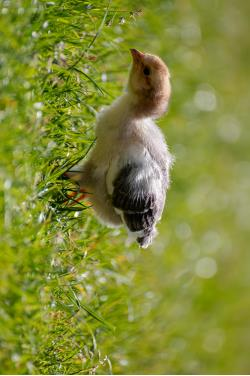

In [41]:
import numpy as np
from math import *
from PIL import Image
img = Image.open('figures/chiken.jpg')
print(img.size)
img

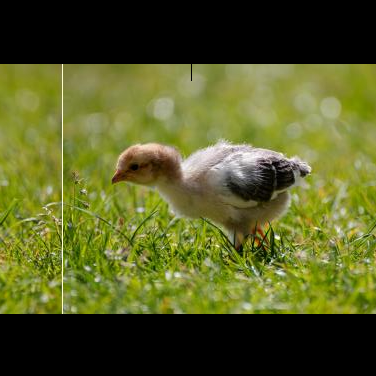

In [64]:
def point_rotate(x0, y0, W, H, alpha):
    trans = np.array([[cos(alpha), -sin(alpha), 0],
                       [sin(alpha), cos(alpha), 0],
                       [-0.5*W*cos(alpha)-0.5*H*sin(alpha)-0.5*W, 0.5*W*sin(alpha)-0.5*H*cos(alpha)+0.5*H, 1]])
    temp = np.array([x0, y0, 1])
    res = np.matmul(temp, trans)
    return (int(res[0]), int(res[1]))


def image_rotate(image, alpha):
    (H, W, C) = image.shape
    img = np.zeros((max(W, H), max(W, H), C))
    for k in range(C):
        for i in range(W):
            for j in range(H):
                (x1, y1) = point_rotate(i, j, W, H, alpha)
                img[y1, x1, k] = image[j, i, k]
    return img

a = np.array(img)
res = image_rotate(a, pi/2)
b = Image.fromarray(np.uint8(res))
b